### Load

In [24]:
import pickle
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor, Booster
with open('../models/lasso.pkl', 'rb') as f:
    lasso:Lasso = pickle.load(f)
with open('../models/scalers/lasso_scaler.pkl', 'rb') as f:
    lasso_scaler:StandardScaler = pickle.load(f)

with open('../models/dt.pkl', 'rb') as f:
    dt:DecisionTreeRegressor = pickle.load(f)
with open('../models/scalers/dt_scaler.pkl', 'rb') as f:
    dt_scaler:StandardScaler = pickle.load(f)

with open('../models/gbt.pkl', 'rb') as f:
    gbt:GradientBoostingRegressor = pickle.load(f)
with open('../models/scalers/gbt_scaler.pkl', 'rb') as f:
    gbt_scaler:StandardScaler = pickle.load(f)

lgbm = Booster(model_file='../models/lgbm.txt')
with open('../models/scalers/lgbm_scaler.pkl', 'rb') as f:
    lgbm_scaler:StandardScaler = pickle.load(f)

test_set = pd.read_csv('../data/7_model_specific_data_sets/test_with_outliers.csv')
test_no_out_set = pd.read_csv('../data/7_model_specific_data_sets/test_without_outliers.csv')

# lasso.predict()

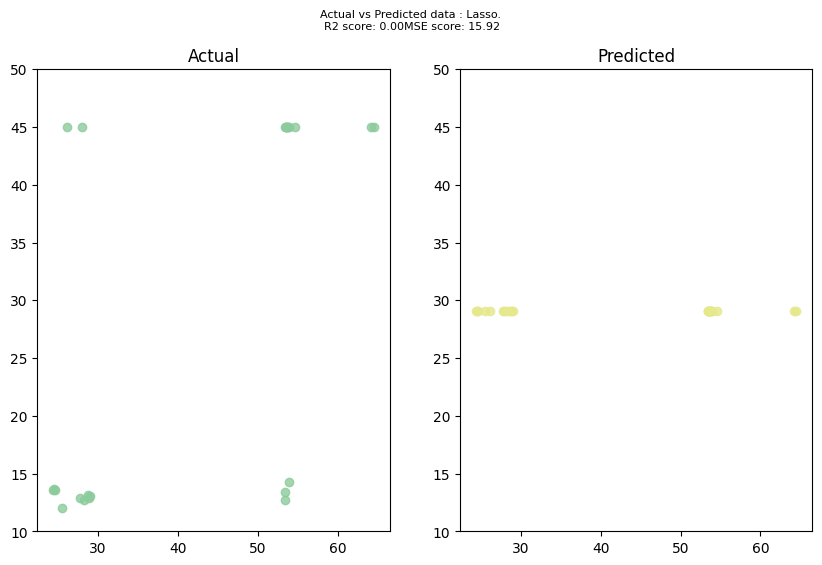

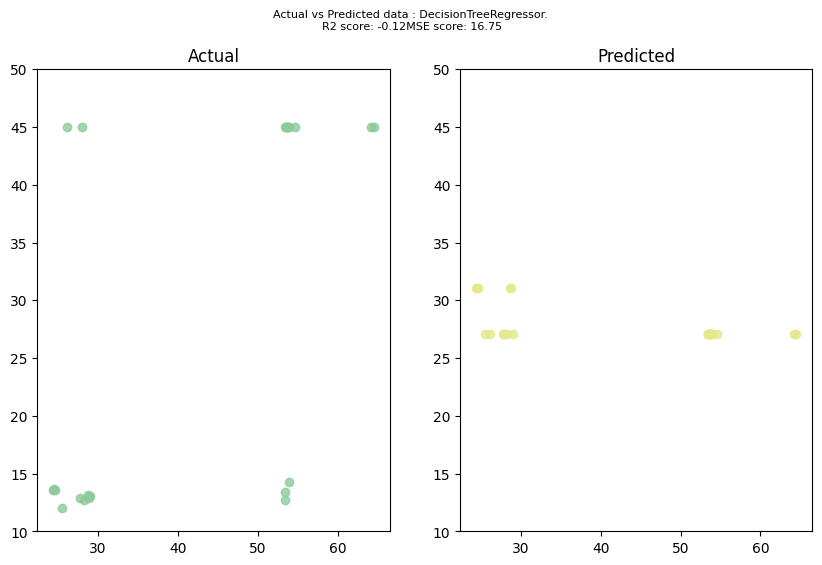

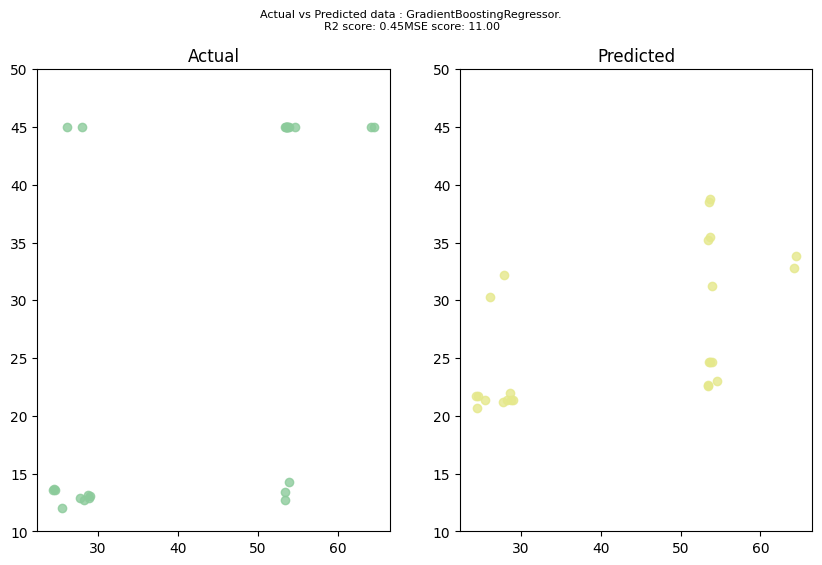

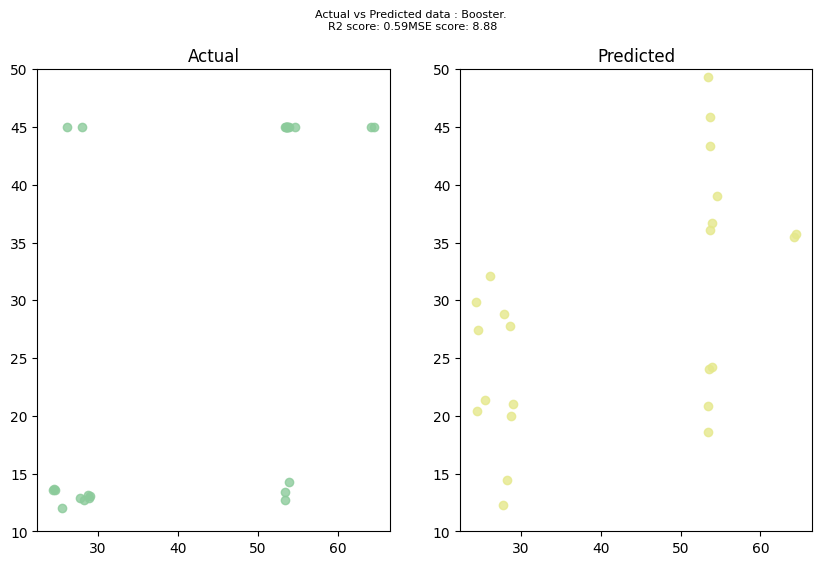

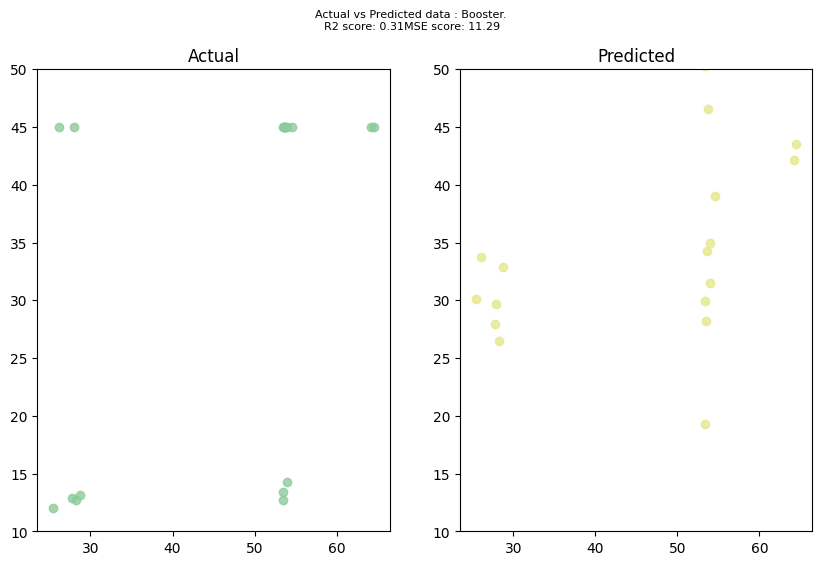

((19, 23), (19, 23))

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error as mse
def two_d_compare(X_test,y_test,y_pred,model_name):
    
    plt.subplots(ncols=2, figsize=(10,6))
    plt.suptitle('Actual vs Predicted data : ' +model_name + '. \nR2 score: %.2f' % r2_score(y_test, y_pred) +  'MSE score: %.2f' % mse(y_test, y_pred), fontsize=8)
    plt.ylim([10, 50])
    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')
    plt.ylim([10, 50])

    plt.subplot(122)
    plt.scatter(X_test, y_pred,alpha=0.8, color='#E5E88B')
    plt.title('Predicted')
    plt.show()
    
    
def predict(estimator, scaler:StandardScaler, df, n_cols):
    scaled_df = scaler.fit_transform(df)

    X = scaled_df[:, :n_cols]
    y_true = scaled_df[:, -1:]
    y_pred = estimator.predict(X).reshape(len(y_true), 1)
    pred = np.append(df.iloc[:, :-1].values, y_pred, axis=1)
    pred = scaler.inverse_transform(pred)

    two_d_compare(df.iloc[:, 0], df.iloc[:, -1], pred[:, -1],estimator.__class__.__name__)
    
    return scaled_df.shape, pred.shape

predict(lasso, lasso_scaler, test_set, 5)
predict(dt, dt_scaler, test_set, 2)
predict(gbt, gbt_scaler, test_set, 9)
predict(lgbm, lgbm_scaler, test_set, 15)
predict(lgbm, lgbm_scaler, test_no_out_set, 15)

[27.96741842 30.09629654 33.78690553 29.65749043 34.28718097 28.20063455
 46.51923976 50.29573459 31.49914011 42.1812532  43.49821901 57.94556147
 51.4409842  39.03312894 34.9952544  29.91794658 19.31262313 26.48030067
 32.88805375]


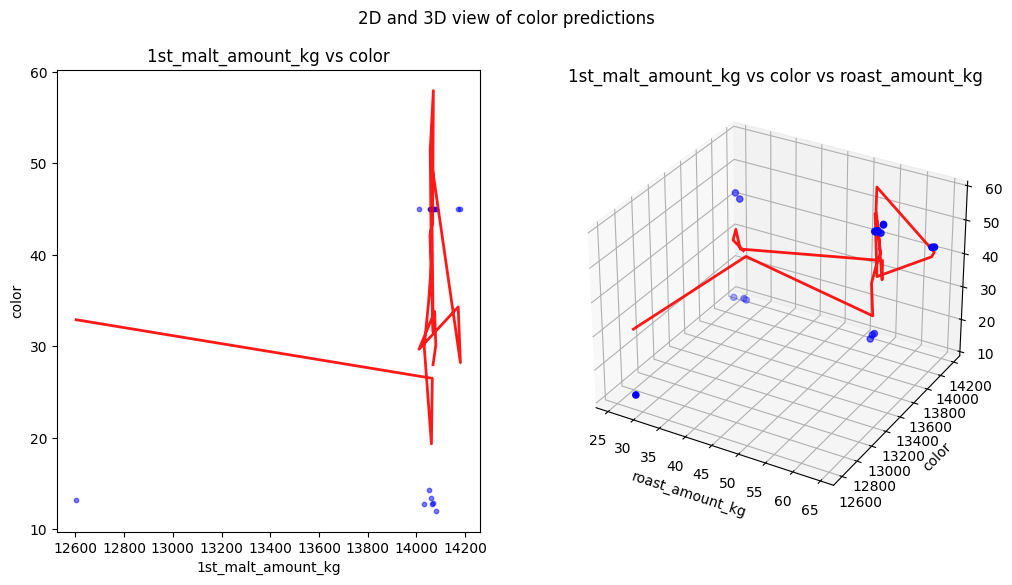

In [23]:
import matplotlib.pyplot as plt


def two_vs_three(x_test,y_test,y_pred,z=None, isLinear = False, names=None) : 
    
    area = 10
    

    fig = plt.figure(figsize=(12,6))
    fig.suptitle('2D and 3D view of color predictions')

    # First subplot
    ax = fig.add_subplot(1, 2,1)
    ax.scatter(x_test, y_test, alpha=0.5,color='blue', s= area)
    ax.plot(x_test, y_pred, alpha=0.9,color='red', linewidth=2)
    ax.set_xlabel(names['x'])
    ax.set_ylabel(names['y'])
    
    plt.title(f"{names['x']} vs {names['y']}")
    
    if not isLinear : 
    # Second subplot
        ax = fig.add_subplot(1,2,2, projection='3d')

        ax.scatter(z, x_test, y_test, color='blue', marker='o')
        ax.plot(z, x_test, y_pred, alpha=0.9,color='red', linewidth=2)
        ax.set_xlabel(names['x'])
        ax.set_ylabel(names['y'])
        ax.set_xlabel(names['z'])
    

    plt.title(f"{names['x']} vs {names['y']} vs {names['z']}")

    plt.show()

def predict_2v3(estimator, scaler:StandardScaler, df, n_cols):
    scaled_df = scaler.fit_transform(df)

    X = scaled_df[:, :n_cols]
    y_true = scaled_df[:, -1:]
    y_pred = estimator.predict(X).reshape(len(y_true), 1)
    pred = np.append(df.iloc[:, :-1].values, y_pred, axis=1)
    pred = scaler.inverse_transform(pred)
    print(pred[:, -1])
    two_vs_three(df.iloc[:, 1], df.iloc[:, -1], pred[:, -1],df.iloc[:, 0], isLinear=False, names={'x':df.columns[1], 'y':df.columns[-1], 'z':df.columns[0]})
predict_2v3(lgbm, lgbm_scaler, test_no_out_set, 15)

In [18]:
test_no_out_set

,roast_amount_kg,1st_malt_amount_kg,2nd_malt_amount_kg,mt_temperature,mt_time,wk_temperature,wk_steam,wk_time,total_cold_wort,ph,...,whp_rest_time,1st_malt_color,2nd_malt_color,divide__total_cold_wort__woc_time,multiply__1st_malt_amount_kg__extract,multiply__2nd_malt_amount_kg__ph,divide__woc_time__whp_transfer_time,multiply__whp_rest_time__2nd_malt_color,multiply__mt_time__wk_time,color
0,27.734987,14068.47146,6159.588855,67.243271,6746.700,105.544501,6589.75,6619.850,950.300,5.570061,...,14.494583,6.02,6.02,0.306314,215699.422580,34309.286858,4.306419,87.25739,4.466214e+07,12.875948
1,25.477513,14079.75896,6155.557605,66.967902,6622.000,105.269124,6933.75,6701.550,993.300,5.608614,...,14.494583,6.02,6.02,0.308934,210726.286310,34524.145558,4.008418,87.25739,4.437766e+07,12.018458
2,26.122487,14074.97500,6067.246460,67.072473,6704.775,105.098326,7320.75,7405.675,958.900,5.734031,...,14.494583,6.02,6.02,0.303615,206942.013801,34789.777102,4.332304,87.25739,4.965338e+07,44.990000
3,27.950000,14010.78679,6075.846460,67.107329,6718.750,105.133183,6686.50,6534.925,957.825,5.762823,...,14.494583,6.02,6.02,0.306509,209160.604757,35014.026910,4.267691,87.25739,4.390653e+07,44.990000
4,53.642526,14171.61792,6074.233960,66.866813,6611.250,105.237753,6536.00,6756.375,954.600,5.743791,...,14.494583,6.02,6.02,0.306320,220853.834766,34889.127575,4.287425,87.25739,4.466808e+07,44.990000
5,53.535052,14180.80896,6081.490210,67.417559,6602.650,105.237753,6847.75,6643.500,958.900,5.743791,...,14.494583,6.02,6.02,0.306853,220386.830752,34930.805956,4.280263,87.25739,4.386471e+07,44.990000
6,53.750000,14081.58667,6078.050000,66.901670,6574.700,105.168039,6654.25,6537.075,958.900,5.757943,...,14.494583,6.02,6.02,0.306642,218188.357505,34997.064935,4.190623,87.25739,4.297931e+07,44.990000
7,53.427513,14061.53750,6068.858960,67.037616,6591.900,105.133183,6460.75,6573.625,963.200,5.719391,...,14.494583,6.02,6.02,0.307805,216521.428547,34710.176017,4.254820,87.25739,4.333268e+07,44.990000
8,53.965013,14068.95542,6070.138147,67.037616,6730.575,105.202896,6697.25,6548.900,959.975,5.791615,...,14.494583,6.02,6.02,0.303749,216853.632812,35155.900595,4.316154,87.25739,4.407786e+07,44.990000
9,64.177579,14055.78667,6070.202710,67.208414,6597.275,105.168039,6686.50,6781.100,963.200,5.816015,...,14.494583,6.02,6.02,0.306227,216854.923422,35304.389104,4.245713,87.25739,4.473678e+07,44.990000
